# Part 1: AVIRIS-NG Data Introduction

##### Access the AVIRIS-NG L2 Surface Reflectance product page via ORNL DAAC
https://daac.ornl.gov/cgi-bin/dsviewer.pl?ds_id=1988

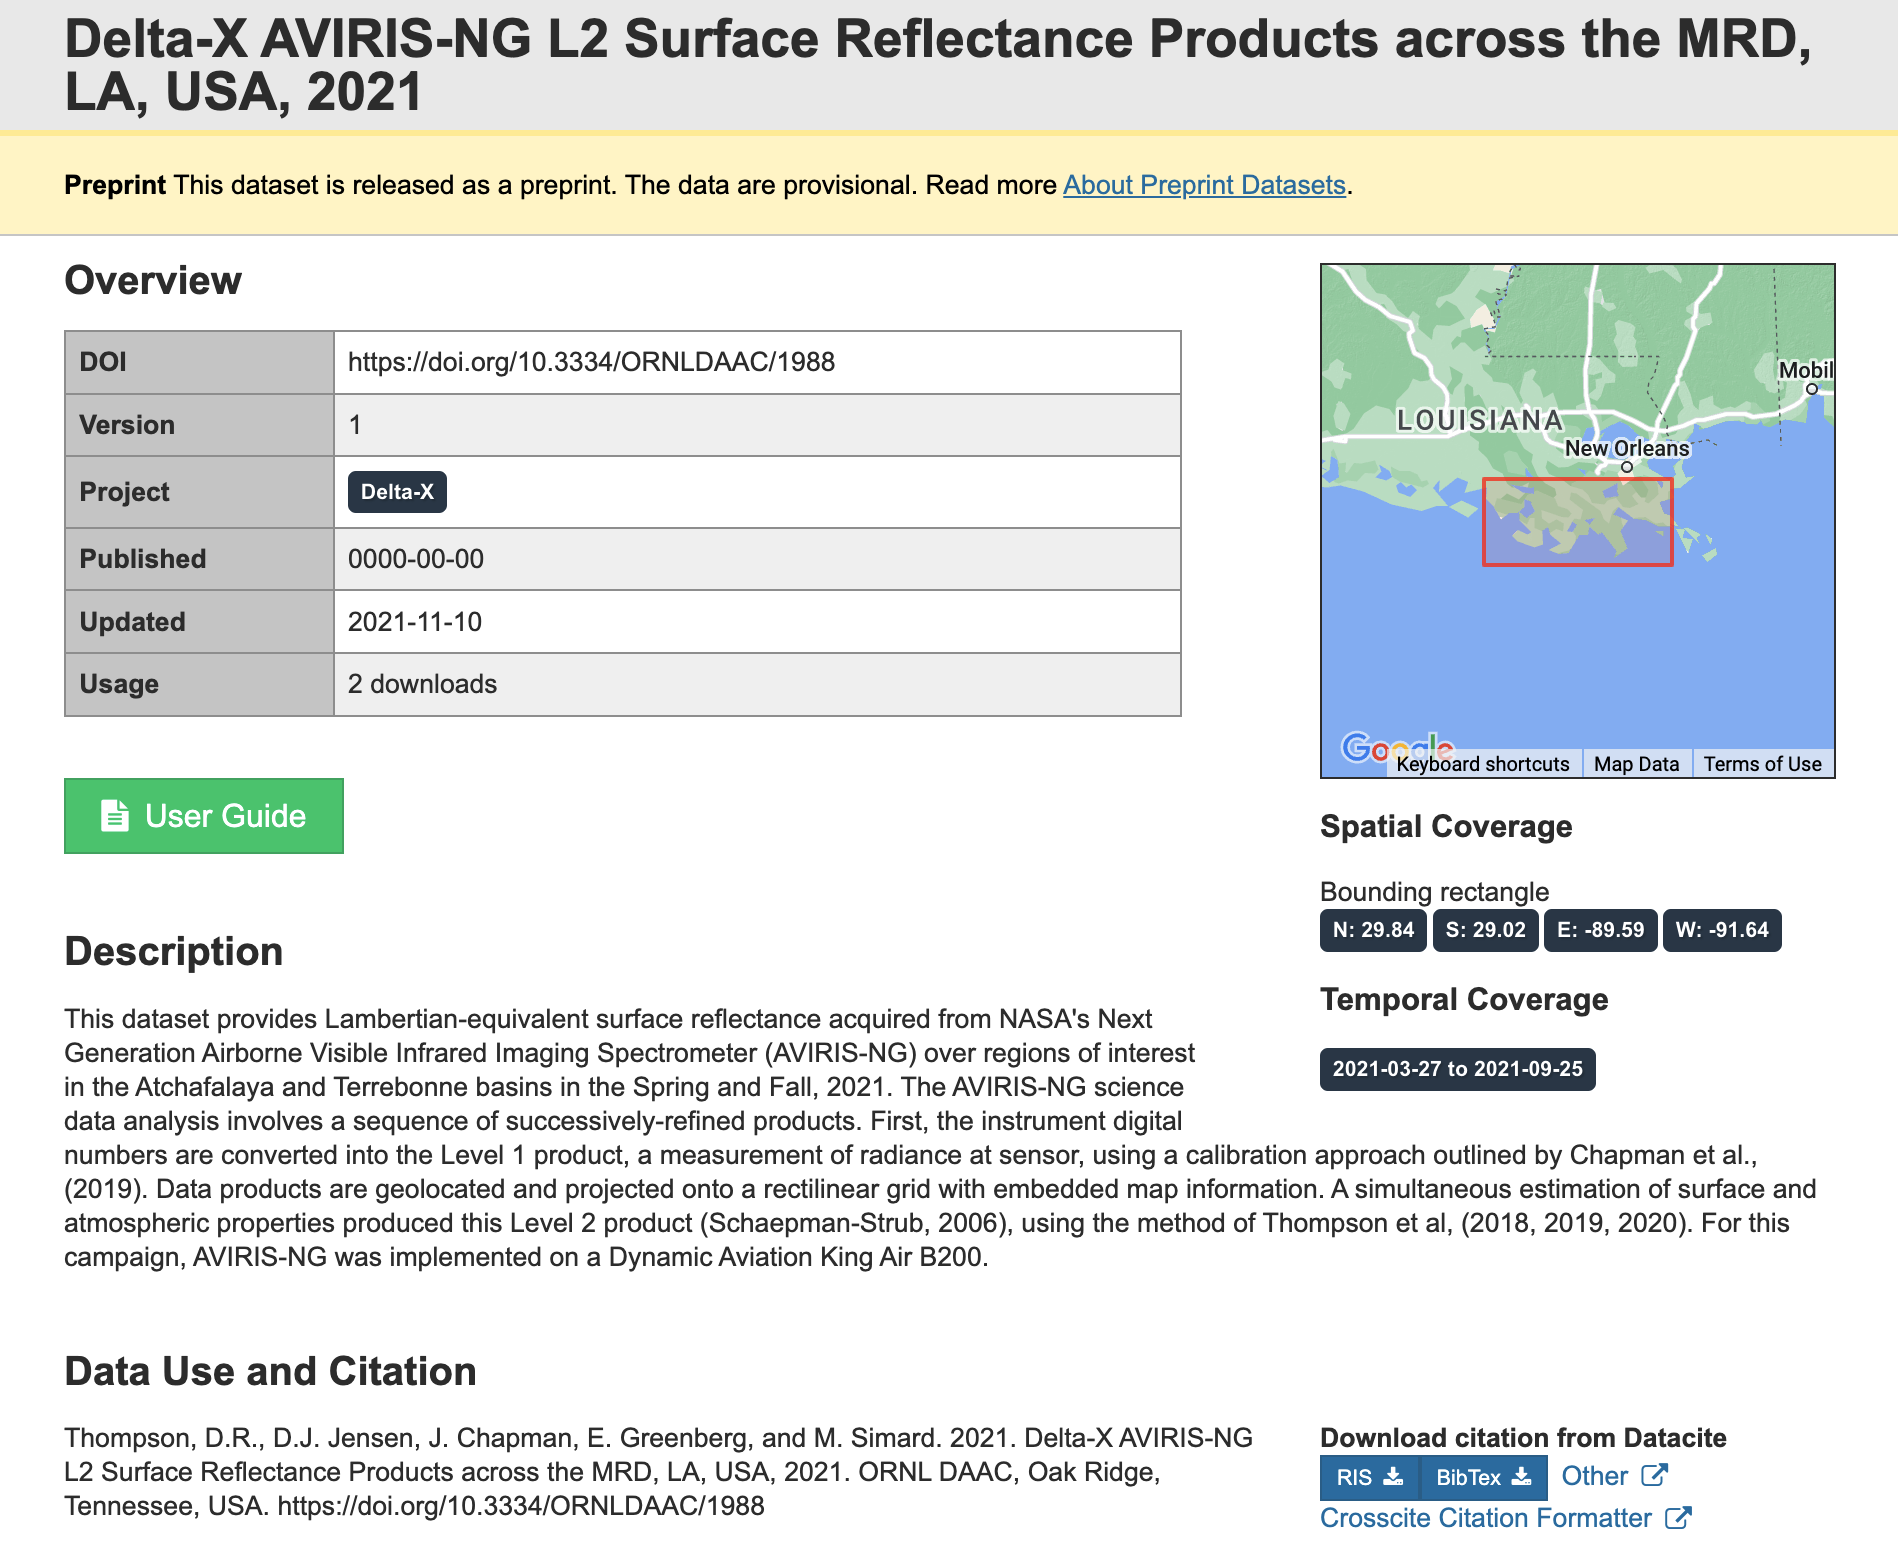

#### Download ang20210401t150456_rfl + ang20210401t150456_rfl.hdr
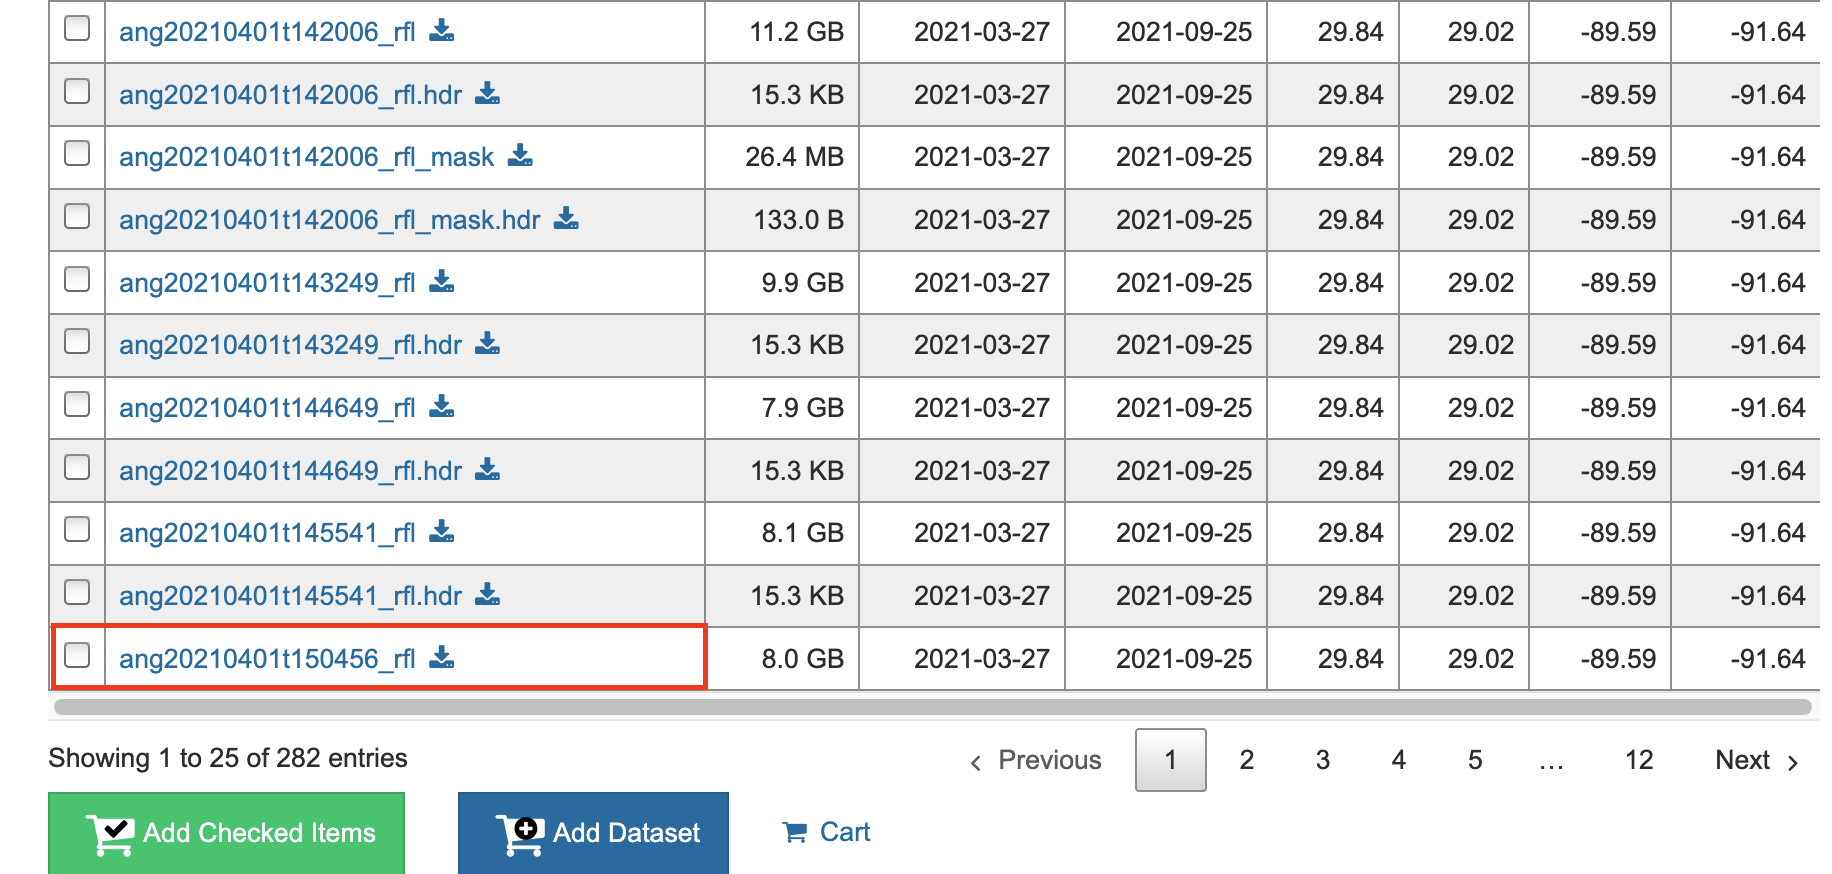

In [ ]:
# Import libraries
import gdal
import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
### Use this cell for Google Colab

# Setup Google Colab:
# For access to Google Drive files
from google.colab import files
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# For saving to Google Drive
from google.colab import drive
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
Gdrive = GoogleDrive(gauth)

drive.mount('/content/drive',force_remount=True)

# Path containing the data files
file_dir = '/content/drive/My Drive/DeltaX_Workshop_2022/Tutorials/1_AVIRIS-NG'
# Set input and output working directories and file location
input_dir = os.path.join(file_dir, 'data')
# Set output directory to your desired Google Drive Folder
output_dir = os.path.join(input_dir, 'Output')
file = os.path.join(input_dir, 'ang20210401t150456_rfl')

Mounted at /content/drive


In [ ]:
### Use this cell if downloading to run in a Jupyter Notebook

# # Set working directories and file location to your own desired folder path
# file_dir = r'/Users/dajensen/Documents/Delta-X/OpenDataWorkshop/AVIRISng/'
# input_dir = os.path.join(file_dir, 'Input')
# output_dir = os.path.join(file_dir, 'Output')
# file = os.path.join(input_dir, 'ang20210401t150456_rfl')

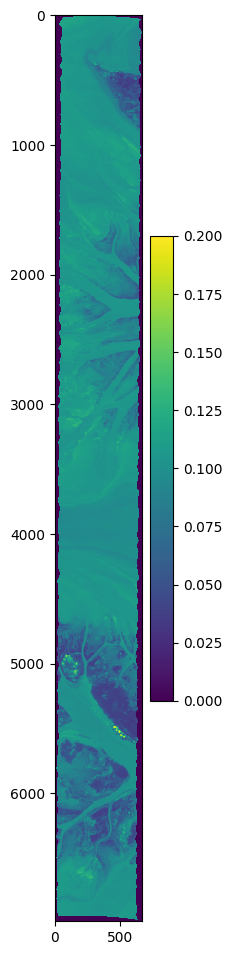

In [ ]:
# Open image file and visualize band 57 (red)
img_open = gdal.Open(file)
img_red = img_open.GetRasterBand(57).ReadAsArray()
plt.rcParams['figure.figsize'] = [2, 12]
plt.rcParams['figure.dpi'] = 100
plt.imshow(img_red, vmin=0, vmax=0.2)
plt.colorbar()
plt.show()

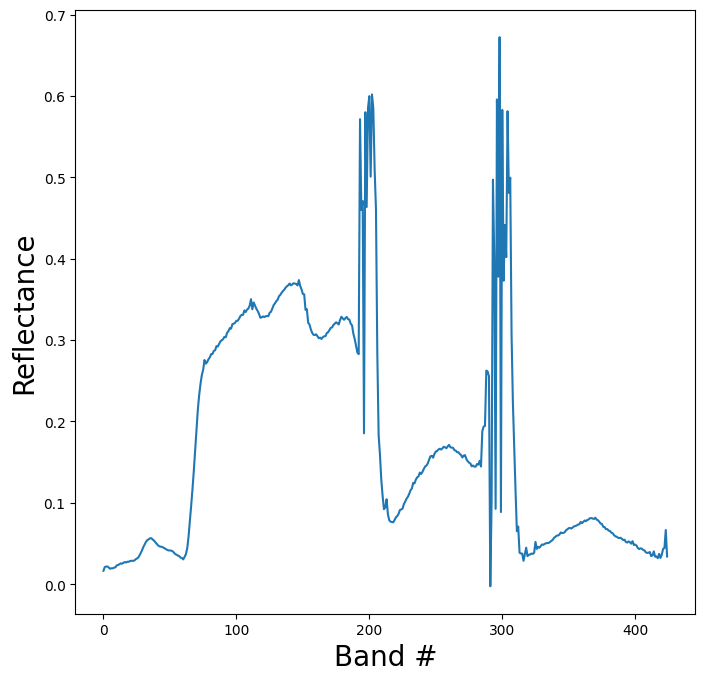

In [ ]:
#Load a single pixel and plot its reflectance spectrum
pixel1 = img_open.ReadAsArray(500, 5400, 1, 1)
pixel1 = np.reshape(pixel1, (425))
plt.rcParams['figure.figsize'] = [8, 8]
plt.plot(pixel1)
plt.xlabel('Band #', fontsize=20)
plt.ylabel('Reflectance', fontsize=20)
plt.show()

In [ ]:
# Define the wavelengths and bad bands list
wavelengths = [377.071821 , 382.081821 , 387.091821 , 392.10182100000003 , 397.10182100000003 , 402.11182099999996 , 407.121821 , 412.131821 , 417.14182100000005 , 422.151821 , 427.161821 , 432.171821 , 437.171821 , 442.18182099999996 , 447.191821 , 452.201821 , 457.21182100000004 , 462.221821 , 467.23182099999997 , 472.23182099999997 , 477.241821 , 482.251821 , 487.261821 , 492.271821 , 497.28182100000004 , 502.291821 , 507.30182099999996 , 512.301821 , 517.3118209999999 , 522.321821 , 527.331821 , 532.3418210000001 , 537.351821 , 542.361821 , 547.361821 , 552.3718210000001 , 557.381821 , 562.3918209999999 , 567.401821 , 572.411821 , 577.4218209999999 , 582.431821 , 587.431821 , 592.441821 , 597.451821 , 602.461821 , 607.471821 , 612.4818210000001 , 617.491821 , 622.491821 , 627.501821 , 632.511821 , 637.521821 , 642.5318209999999 , 647.541821 , 652.551821 , 657.561821 , 662.561821 , 667.571821 , 672.581821 , 677.591821 , 682.601821 , 687.611821 , 692.6218210000001 , 697.6218210000001 , 702.631821 , 707.6418209999999 , 712.651821 , 717.661821 , 722.671821 , 727.681821 , 732.691821 , 737.691821 , 742.701821 , 747.711821 , 752.721821 , 757.7318210000001 , 762.741821 , 767.751821 , 772.751821 , 777.761821 , 782.7718209999999 , 787.781821 , 792.791821 , 797.801821 , 802.811821 , 807.821821 , 812.821821 , 817.831821 , 822.841821 , 827.851821 , 832.861821 , 837.8718210000001 , 842.881821 , 847.881821 , 852.891821 , 857.901821 , 862.9118209999999 , 867.921821 , 872.931821 , 877.941821 , 882.951821 , 887.951821 , 892.961821 , 897.971821 , 902.981821 , 907.991821 , 913.0018210000001 , 918.011821 , 923.0218209999999 , 928.0218209999999 , 933.031821 , 938.041821 , 943.0518209999999 , 948.061821 , 953.071821 , 958.081821 , 963.081821 , 968.091821 , 973.101821 , 978.1118210000001 , 983.121821 , 988.131821 , 993.141821 , 998.151821 , 1003.1518210000002 , 1008.161821 , 1013.171821 , 1018.181821 , 1023.1918209999999 , 1028.2018209999999 , 1033.211821 , 1038.2118209999999 , 1043.2218209999999 , 1048.2318209999999 , 1053.241821 , 1058.251821 , 1063.261821 , 1068.271821 , 1073.2818209999998 , 1078.281821 , 1083.291821 , 1088.301821 , 1093.311821 , 1098.321821 , 1103.331821 , 1108.341821 , 1113.341821 , 1118.351821 , 1123.361821 , 1128.371821 , 1133.381821 , 1138.391821 , 1143.4018210000002 , 1148.4118210000001 , 1153.411821 , 1158.421821 , 1163.4318210000001 , 1168.4418210000001 , 1173.451821 , 1178.4618209999999 , 1183.4718209999999 , 1188.471821 , 1193.481821 , 1198.4918209999998 , 1203.5018209999998 , 1208.511821 , 1213.521821 , 1218.531821 , 1223.541821 , 1228.541821 , 1233.551821 , 1238.561821 , 1243.571821 , 1248.581821 , 1253.5918210000002 , 1258.601821 , 1263.601821 , 1268.611821 , 1273.6218210000002 , 1278.631821 , 1283.641821 , 1288.651821 , 1293.661821 , 1298.671821 , 1303.671821 , 1308.681821 , 1313.691821 , 1318.701821 , 1323.711821 , 1328.721821 , 1333.731821 , 1338.731821 , 1343.741821 , 1348.751821 , 1353.761821 , 1358.771821 , 1363.7818209999998 , 1368.791821 , 1373.801821 , 1378.801821 , 1383.811821 , 1388.821821 , 1393.831821 , 1398.841821 , 1403.851821 , 1408.861821 , 1413.861821 , 1418.871821 , 1423.881821 , 1428.891821 , 1433.9018210000002 , 1438.9118210000001 , 1443.921821 , 1448.931821 , 1453.9318210000001 , 1458.9418210000001 , 1463.9518209999999 , 1468.9618209999999 , 1473.9718209999999 , 1478.981821 , 1483.991821 , 1488.9918209999998 , 1494.0018209999998 , 1499.011821 , 1504.021821 , 1509.031821 , 1514.041821 , 1519.051821 , 1524.061821 , 1529.061821 , 1534.071821 , 1539.081821 , 1544.091821 , 1549.101821 , 1554.111821 , 1559.121821 , 1564.1218210000002 , 1569.131821 , 1574.141821 , 1579.151821 , 1584.161821 , 1589.1718210000001 , 1594.1818210000001 , 1599.1918210000001 , 1604.191821 , 1609.201821 , 1614.211821 , 1619.221821 , 1624.2318209999999 , 1629.2418209999998 , 1634.251821 , 1639.251821 , 1644.261821 , 1649.2718209999998 , 1654.281821 , 1659.291821 , 1664.301821 , 1669.311821 , 1674.321821 , 1679.321821 , 1684.331821 , 1689.341821 , 1694.351821 , 1699.3618210000002 , 1704.371821 , 1709.381821 , 1714.381821 , 1719.3918210000002 , 1724.4018210000002 , 1729.411821 , 1734.421821 , 1739.431821 , 1744.441821 , 1749.451821 , 1754.4518209999999 , 1759.4618209999999 , 1764.471821 , 1769.481821 , 1774.491821 , 1779.501821 , 1784.511821 , 1789.511821 , 1794.521821 , 1799.531821 , 1804.541821 , 1809.5518209999998 , 1814.561821 , 1819.571821 , 1824.581821 , 1829.5818210000002 , 1834.591821 , 1839.601821 , 1844.611821 , 1849.621821 , 1854.631821 , 1859.6418210000002 , 1864.6518210000002 , 1869.651821 , 1874.661821 , 1879.6718210000001 , 1884.6818210000001 , 1889.691821 , 1894.7018209999999 , 1899.7118209999999 , 1904.711821 , 1909.721821 , 1914.7318209999999 , 1919.7418209999998 , 1924.751821 , 1929.761821 , 1934.771821 , 1939.781821 , 1944.781821 , 1949.791821 , 1954.801821 , 1959.811821 , 1964.821821 , 1969.831821 , 1974.841821 , 1979.841821 , 1984.851821 , 1989.8618210000002 , 1994.871821 , 1999.881821 , 2004.8918210000002 , 2009.9018210000002 , 2014.9118210000001 , 2019.911821 , 2024.921821 , 2029.931821 , 2034.941821 , 2039.9518209999999 , 2044.9618209999999 , 2049.971821 , 2054.971821 , 2059.981821 , 2064.991821 , 2070.001821 , 2075.011821 , 2080.021821 , 2085.031821 , 2090.041821 , 2095.0418210000003 , 2100.051821 , 2105.0618210000002 , 2110.071821 , 2115.0818209999998 , 2120.091821 , 2125.1018209999997 , 2130.1018209999997 , 2135.111821 , 2140.121821 , 2145.131821 , 2150.141821 , 2155.151821 , 2160.161821 , 2165.171821 , 2170.171821 , 2175.1818209999997 , 2180.1918210000003 , 2185.201821 , 2190.2118210000003 , 2195.221821 , 2200.231821 , 2205.231821 , 2210.241821 , 2215.251821 , 2220.2618209999996 , 2225.2718210000003 , 2230.281821 , 2235.2918210000003 , 2240.301821 , 2245.301821 , 2250.311821 , 2255.321821 , 2260.3318209999998 , 2265.341821 , 2270.351821 , 2275.361821 , 2280.361821 , 2285.371821 , 2290.381821 , 2295.391821 , 2300.401821 , 2305.4118209999997 , 2310.421821 , 2315.4318209999997 , 2320.431821 , 2325.441821 , 2330.451821 , 2335.461821 , 2340.471821 , 2345.481821 , 2350.491821 , 2355.491821 , 2360.5018210000003 , 2365.511821 , 2370.5218210000003 , 2375.531821 , 2380.541821 , 2385.551821 , 2390.561821 , 2395.561821 , 2400.571821 , 2405.581821 , 2410.591821 , 2415.601821 , 2420.611821 , 2425.621821 , 2430.6218209999997 , 2435.631821 , 2440.6418209999997 , 2445.651821 , 2450.661821 , 2455.6718210000004 , 2460.681821 , 2465.691821 , 2470.691821 , 2475.701821 , 2480.711821 , 2485.7218209999996 , 2490.731821 , 2495.741821 , 2500.7518210000003]
bblist = np.ones((425,))
bblist[0:14] = 0
bblist[189:225] = 0
bblist[281:336] = 0
bblist[405:] = 0

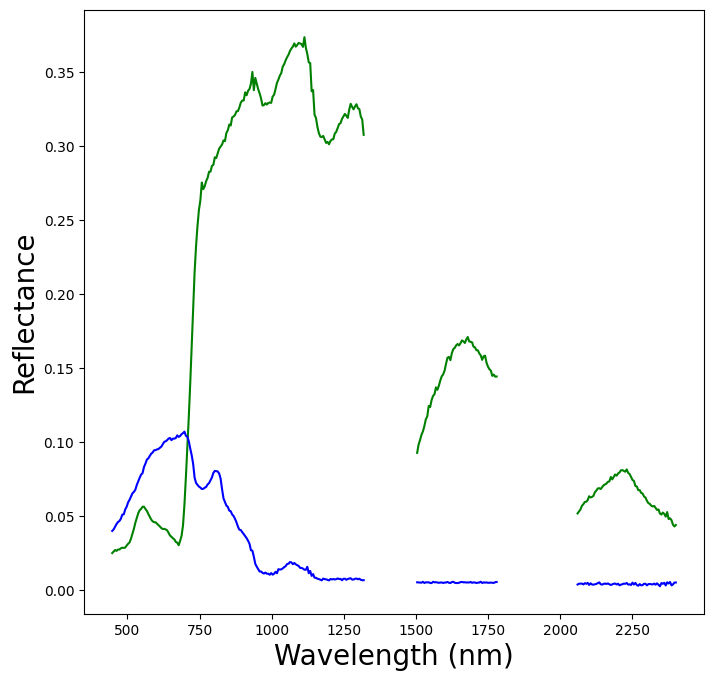

In [ ]:
# Re-plot with the bad bands list and wavelengths applied
pixel2 = img_open.ReadAsArray(200, 200, 1, 1)
pixel2 = np.reshape(pixel2, (425))
pixel1[bblist == 0] = np.nan
pixel2[bblist == 0] = np.nan

# Compare vegetation and water spectra
plt.plot(wavelengths, pixel1, color = 'g')
plt.plot(wavelengths, pixel2, color = 'b')
plt.xlabel('Wavelength (nm)', fontsize=20)
plt.ylabel('Reflectance', fontsize=20)
plt.show()

In [ ]:
# Extract RGB bands and save as a 3-band GeoTiff to visualize in QGIS
red = img_open.GetRasterBand(57).ReadAsArray()
green = img_open.GetRasterBand(38).ReadAsArray()
blue = img_open.GetRasterBand(22).ReadAsArray()
print(wavelengths[21])
print(wavelengths[37])
print(wavelengths[56])

outfile = os.path.join(output_dir, 'RGB.tif')
rows = img_open.RasterYSize
cols = img_open.RasterXSize
datatype = img_open.GetRasterBand(1).DataType
projection = img_open.GetProjection()
transform = img_open.GetGeoTransform()
driver = gdal.GetDriverByName("GTiff")
DataSetOut = driver.Create(outfile, cols, rows, 3, datatype)
DataSetOut.GetRasterBand(1).WriteArray(blue)
DataSetOut.GetRasterBand(2).WriteArray(green)
DataSetOut.GetRasterBand(3).WriteArray(red)
DataSetOut.SetProjection(projection)
DataSetOut.SetGeoTransform(transform)
DataSetOut = None

482.251821
562.3918209999999
657.561821


## Part 2: Normalized Difference Vegetation Index

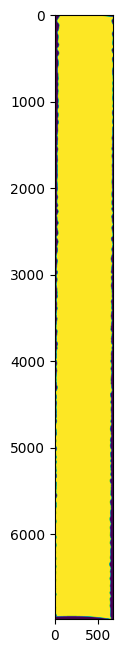

In [ ]:
# Open  Red and NIR bands for creating the NDVI image
img_open = gdal.Open(file)
red = img_open.GetRasterBand(57).ReadAsArray()
nir = img_open.GetRasterBand(99).ReadAsArray()

mask = np.ones(np.shape(red))
mask[red == -9999] = 0

plt.imshow(mask)
plt.show()

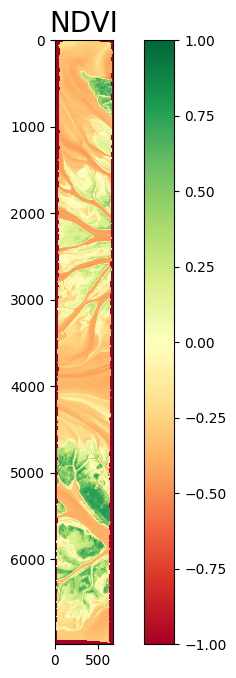

In [ ]:
# Create an NDVI image
ndvi = (nir - red) / (nir + red)
ndvi[mask == 0] = -9999

plt.imshow(ndvi, vmin = -1, vmax = 1, cmap='RdYlGn')
plt.colorbar()
plt.title('NDVI', fontsize=20)
plt.show()

In [ ]:
# Export the image as a GeoTIFF
outfile = os.path.join(output_dir, 'NDVI.tif')
rows = img_open.RasterYSize
cols = img_open.RasterXSize
datatype = img_open.GetRasterBand(1).DataType
projection = img_open.GetProjection()
transform = img_open.GetGeoTransform()
driver = gdal.GetDriverByName("GTiff")
DataSetOut = driver.Create(outfile, cols, rows, 1, datatype)
DataSetOut.GetRasterBand(1).WriteArray(ndvi)
DataSetOut.SetProjection(projection)
DataSetOut.SetGeoTransform(transform)
DataSetOut = None

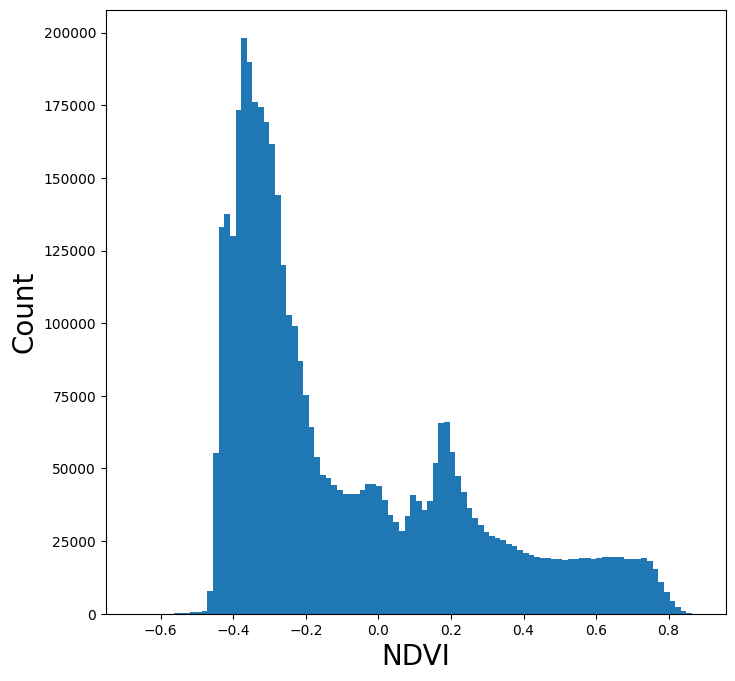

In [ ]:
# Plot a histogram of the NDVI data
ndvi_vals = ndvi[mask == 1]
plt.hist(ndvi_vals, bins=100)
plt.ylabel('Count', fontsize=20)
plt.xlabel('NDVI', fontsize=20)
plt.show()

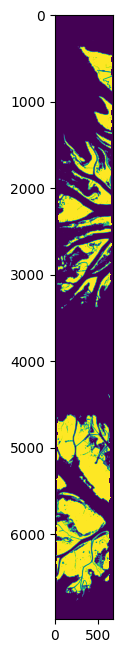

In [ ]:
# Set a threshold for a density slice to mask land/water
dns_slc = np.zeros(np.shape(ndvi))
dns_slc[ndvi > 0.05] = 1
dns_slc[mask == 0] = -9999

plt.imshow(dns_slc, vmin=0)
plt.show()

In [ ]:
# Export the land/water mask as a GeoTIFF
outfile2 = os.path.join(output_dir, 'NDVI_mask.tif')
driver = gdal.GetDriverByName("GTiff")
DataSetOut = driver.Create(outfile2, cols, rows, 1, datatype)
DataSetOut.GetRasterBand(1).WriteArray(dns_slc)
DataSetOut.SetProjection(projection)
DataSetOut.SetGeoTransform(transform)
DataSetOut = None

## Part 3: Principal Components Analysis

In [ ]:
# Perform a PCA transormation on the image

# Create a new array based on the number of good bands and pixels in the image
# Load all of the good band data into a new array
pixels = np.count_nonzero(mask)
bands = np.count_nonzero(bblist)
img_vals = np.zeros((bands, pixels)).astype(int)

# Load each band in individually (This may take a minute)
j = 0
for i in range(0, len(bblist)):
    if bblist[i] == 1:
        
        # Reduce the memory needed by loading only masked values in as integers
        img_vals[j] = ((img_open.GetRasterBand(i+1).ReadAsArray()[mask == 1])*100000).astype(int)
        j += 1

In [ ]:
from sklearn.decomposition import PCA

# Reorder the axes to feed into the PCA function (samples, components)
# This also may take a minute
img_vals = np.rollaxis(img_vals, 1)
n_components = 10
pca = PCA(n_components=n_components)
pca.fit(img_vals)
img_pca = pca.transform(img_vals)

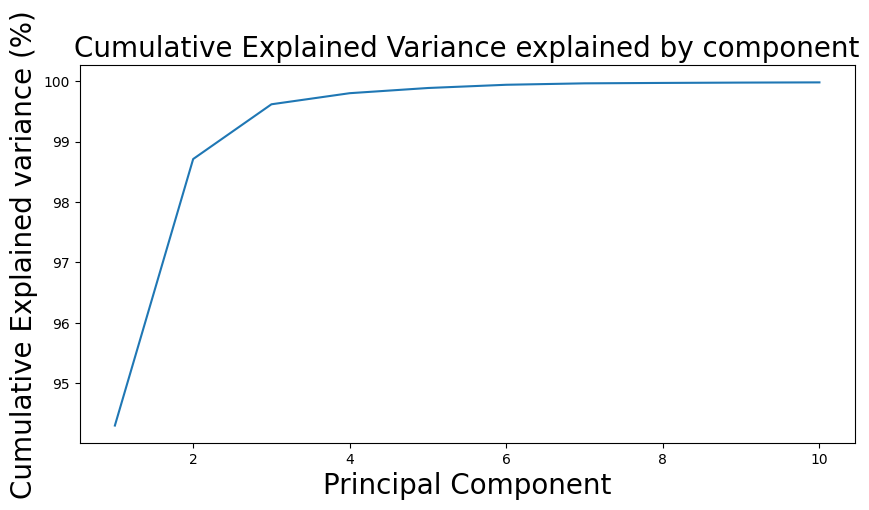

[94.30237234 98.71098425 99.61664159 99.80014445 99.88596088 99.93943993
 99.96300801 99.96986627 99.97539203 99.97887931]


In [ ]:
# Map the PCA output back into the 3D array
pca_bands = np.zeros((n_components, rows, cols))
np.shape(img_pca)
pca_bands[:, mask == 1] = np.rollaxis(img_pca, 1)

# Plot the cumulative explained variance by component
var_cumu = np.cumsum(pca.explained_variance_ratio_)*100

plt.figure(figsize=[10,5])
plt.title('Cumulative Explained Variance by Component', fontsize=20)
plt.ylabel('Cumulative Explained Variance (%)', fontsize=20)
plt.xlabel('Principal Component', fontsize=20)
plt.plot(range(1, 11), var_cumu)
plt.show()

print(var_cumu)


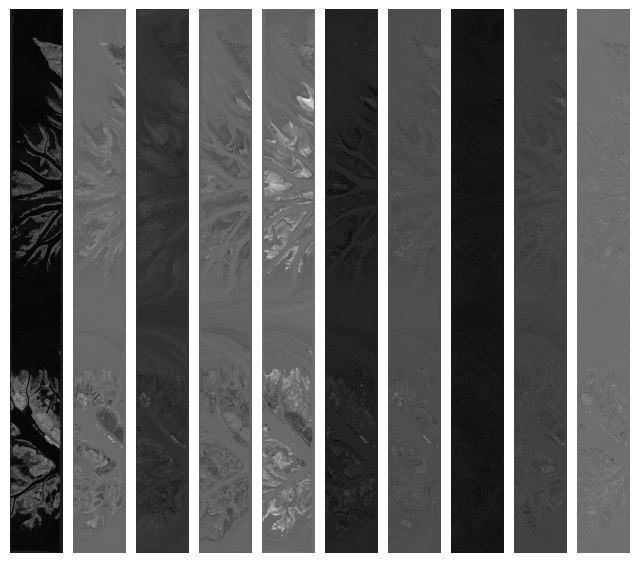

In [ ]:
# subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1,10)
# use the created array to output your multiple images
axarr[0].imshow(pca_bands[0], cmap='gray')
axarr[0].axis('off')
axarr[1].imshow(pca_bands[1], cmap='gray')
axarr[1].axis('off')
axarr[2].imshow(pca_bands[2], cmap='gray')
axarr[2].axis('off')
axarr[3].imshow(pca_bands[3], cmap='gray')
axarr[3].axis('off')
axarr[4].imshow(pca_bands[4], cmap='gray')
axarr[4].axis('off')
axarr[5].imshow(pca_bands[5], cmap='gray')
axarr[5].axis('off')
axarr[6].imshow(pca_bands[6], cmap='gray')
axarr[6].axis('off')
axarr[7].imshow(pca_bands[7], cmap='gray')
axarr[7].axis('off')
axarr[8].imshow(pca_bands[8], cmap='gray')
axarr[8].axis('off')
axarr[9].imshow(pca_bands[9], cmap='gray')
axarr[9].axis('off')
plt.show()

In [ ]:
# Select the PCA bands that together explain >99.9% of the image's varianc
pca_results = pca_bands[0:6]

# Save the 6-band PCA output
outfile = os.path.join(output_dir, 'PCA.tif')
rows = img_open.RasterYSize
cols = img_open.RasterXSize
datatype = img_open.GetRasterBand(1).DataType
projection = img_open.GetProjection()
transform = img_open.GetGeoTransform()
driver = gdal.GetDriverByName("GTiff")
DataSetOut = driver.Create(outfile, cols, rows, 5, datatype)
DataSetOut.GetRasterBand(1).WriteArray(pca_results[0])
DataSetOut.GetRasterBand(2).WriteArray(pca_results[1])
DataSetOut.GetRasterBand(3).WriteArray(pca_results[2])
DataSetOut.GetRasterBand(4).WriteArray(pca_results[3])
DataSetOut.GetRasterBand(5).WriteArray(pca_results[4])
DataSetOut.SetProjection(projection)
DataSetOut.SetGeoTransform(transform)
DataSetOut = None

## Part 4: Classification

In [ ]:
# If skipping over the PCA code section, load the pre-loaded PCA tiff
# pca_results = gdal.Open(os.path.join(output_dir, 'PCA.tif')).ReadAsArray()

from sklearn.cluster import KMeans
X = pca_results[:, mask == 1]
X = np.rollaxis(X, 1)

# Use PCA output for K-Means classification
# First do a simple 2-cluster classification
kmeans = KMeans(n_clusters=2, random_state=0).fit_predict(X)

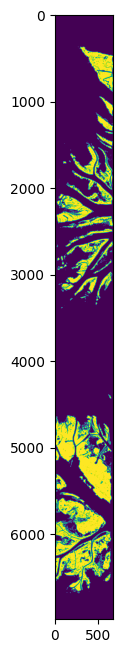

In [ ]:
# Map predicted results and plot
classmap = np.copy(mask)
classmap[mask == 1] = kmeans
plt.imshow(classmap)
plt.show()

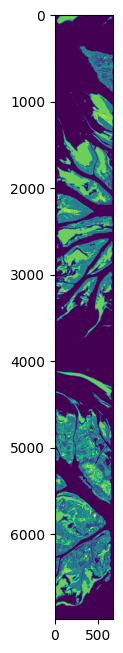

In [ ]:
# Do a 10-cluster output and plot the results
# (With more clusters this may take a minute)
kmeans = KMeans(n_clusters=10, random_state=0).fit_predict(X)
classmap = np.copy(mask)
classmap[mask == 1] = kmeans
plt.imshow(classmap)
plt.show()

In [ ]:
# Use the image mask to enforce a Data Ignore Value (-9999) to avoid confusion with the output value 0
classmap[mask == 0] = -9999

# Save the image and open in QGIS
outfile = os.path.join(output_dir, 'kmeans10.tif')
rows = img_open.RasterYSize
cols = img_open.RasterXSize
datatype = img_open.GetRasterBand(1).DataType
projection = img_open.GetProjection()
transform = img_open.GetGeoTransform()
driver = gdal.GetDriverByName("GTiff")
DataSetOut = driver.Create(outfile, cols, rows, 1, datatype)
DataSetOut.GetRasterBand(1).WriteArray(classmap)
DataSetOut.SetProjection(projection)
DataSetOut.SetGeoTransform(transform)
DataSetOut = None

In [ ]:
# Combine the 10 different output clusters into landcover types
classification = np.zeros(np.shape(mask))
# Water 
classification[(classmap == 0)|(classmap == 7)] = 1
# Tidal mudflat 
classification[(classmap == 3)|(classmap == 4)|(classmap == 8)] = 2
# Senescent/Non-Photosynthetic Vegetation
classification[(classmap == 2)|(classmap == 6)] = 3
# Green Vegetation
classification[(classmap == 1)|(classmap == 5)|(classmap == 9)] = 4
classification[mask == 0] = -9999

outfile = os.path.join(output_dir, 'kmeans_class.tif')
driver = gdal.GetDriverByName("GTiff")
DataSetOut = driver.Create(outfile, cols, rows, 1, datatype)
DataSetOut.GetRasterBand(1).WriteArray(classification)
DataSetOut.SetProjection(projection)
DataSetOut.SetGeoTransform(transform)
DataSetOut = None

#### For more accurate classification results, try adjusting the KMeans parameters such as the number of output classes. You can also change your input bands, including the PCA component selection, add NDVI or other spectral indices, or add other geospatial data that may impact your desired output.

## Part 5: Partial Least Squares Regression and Water Quality Application

In [ ]:
# Build a model for Total Suspended Solids with Pre-Delta-X Data
# Load the TSS and resampled in-situ reflectance data
csv = os.path.join(input_dir, 'PreDeltaX_WaterReflectance+TSS_Atchafalaya_Fall2016.csv')
tss = np.loadtxt(csv, skiprows=1, delimiter=',', usecols=[0])
refl = np.loadtxt(csv, skiprows=1, delimiter=',', usecols=range(1, 113))

In [ ]:
# Develop the PLSR model
from sklearn.cross_decomposition import PLSRegression
def vip(X, Y, model):

    t = model.x_scores_
    w = model.x_weights_
    q = model.y_loadings_

    m, p = X.shape
    _, h = t.shape

    vips = np.zeros((p,))

    s = np.diag(t.T @ t @ q.T @ q).reshape(h, -1)
    total_s = np.sum(s)

    for i in range(p):
        weight = np.array([(w[i,j]/np.linalg.norm(w[:,j]))**2 for j in range(h)])
        vips[i] = np.sqrt(p * (s.T @ weight)/total_s)

    return(vips)

def plsr(X, Y, components):

    pls = PLSRegression(n_components=int(components), scale=False)
    pls.fit(X, Y)
    r2 = pls.score(X, Y)
    pred_Y = pls.predict(X)
    coefs = pls.coef_
    sample = np.reshape(X[0], np.shape(coefs))
    pred_sample = np.sum(sample * coefs)
    constant = float(pred_Y[0] - pred_sample)
    coefs = coefs.flatten()

    vips = vip(X, Y, pls)

    return(pred_Y, coefs, constant, r2, vips)


R2 = 0.8113503086698034


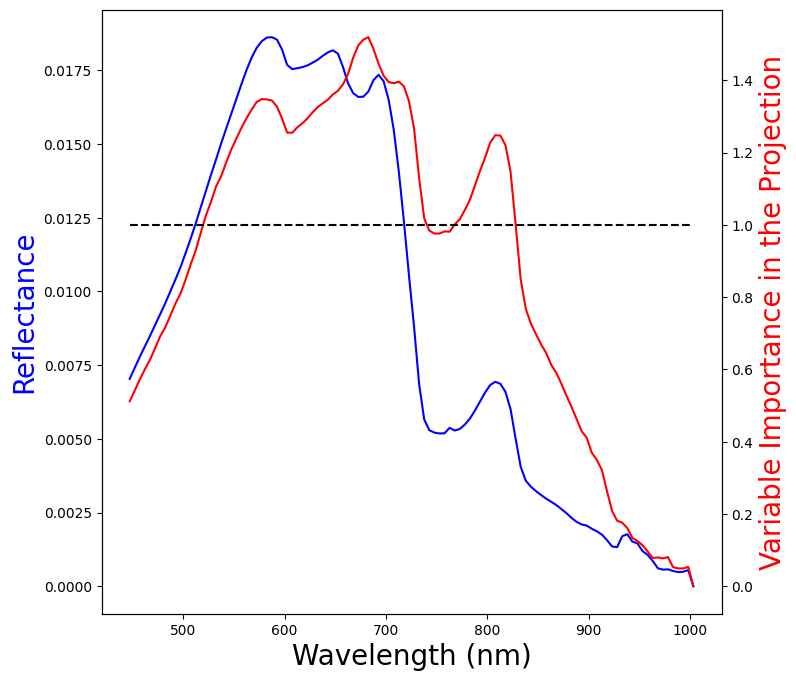

In [ ]:
mean_refl = np.mean(refl, axis=0)
waves = wavelengths[14:126]
# Generate the first PLSR model based on reflectance data
pred_Y, coefs, constant, r2, vips = plsr(refl, tss, 2)
print('R2 = {0}'.format(r2))
plt.plot(waves, mean_refl, color='b')
plt.ylabel('Reflectance', color='b', fontsize=20)
plt.xlabel('Wavelength (nm)', fontsize=20)
plt.twinx()
plt.plot(waves, vips, color='r')
plt.plot([waves[0], waves[-1]], [1,1], linestyle='dashed', color='k')
plt.ylabel('Variable Importance in the Projection', color='r', fontsize=20)
plt.show()

In [ ]:
# Filter model to just VIP>1
vip_bin = np.copy(vips)
vip_bin[vip_bin < 1] = 0
vip_bin[vip_bin >= 1] = 1
refl2 = refl[:, vip_bin == 1]
pred_Y, coefs, constant, r2, vips = plsr(refl2, tss, 2)

print('R2 = {0}'.format(r2))

R2 = 0.8173055930648163


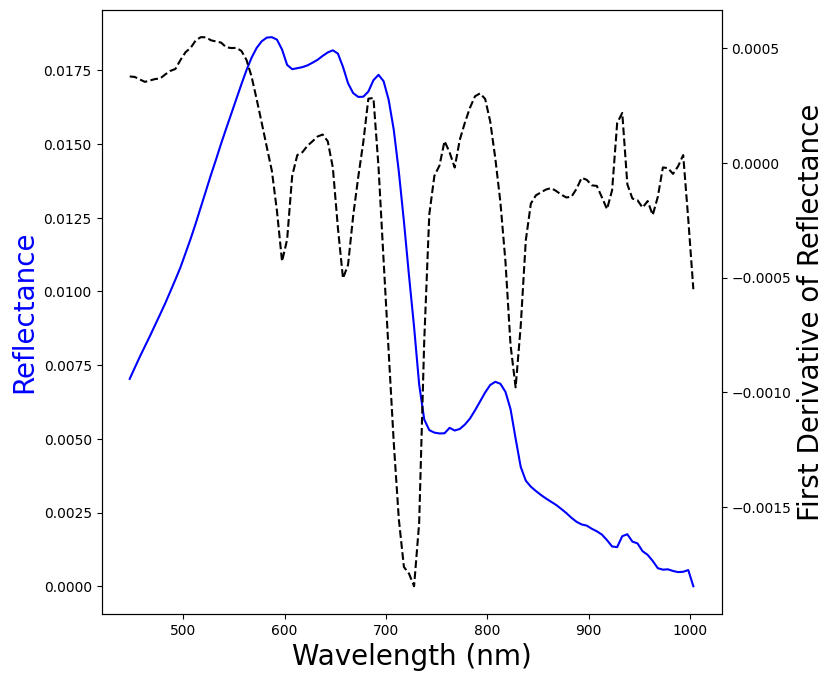

In [ ]:
# Generate the second PLSR model based on first derivatives of the reflectance data
deriv = np.gradient(refl, axis=1)
pred_Y2, coefs2, constant2, r2_2, vips2 = plsr(deriv, tss, 2)

# Plot mean reflectance vs. mean derivative spectra to examine differences
plt.plot(waves, mean_refl, color='b')
plt.ylabel('Reflectance', color='b', fontsize=20)
plt.xlabel('Wavelength (nm)', fontsize=20)
plt.twinx()
plt.plot(waves, np.mean(deriv, axis=0), color='k', linestyle = 'dashed')
plt.ylabel('First Derivative of Reflectance', color='k', fontsize=20)
plt.show()

R2 = 0.8159633233651415


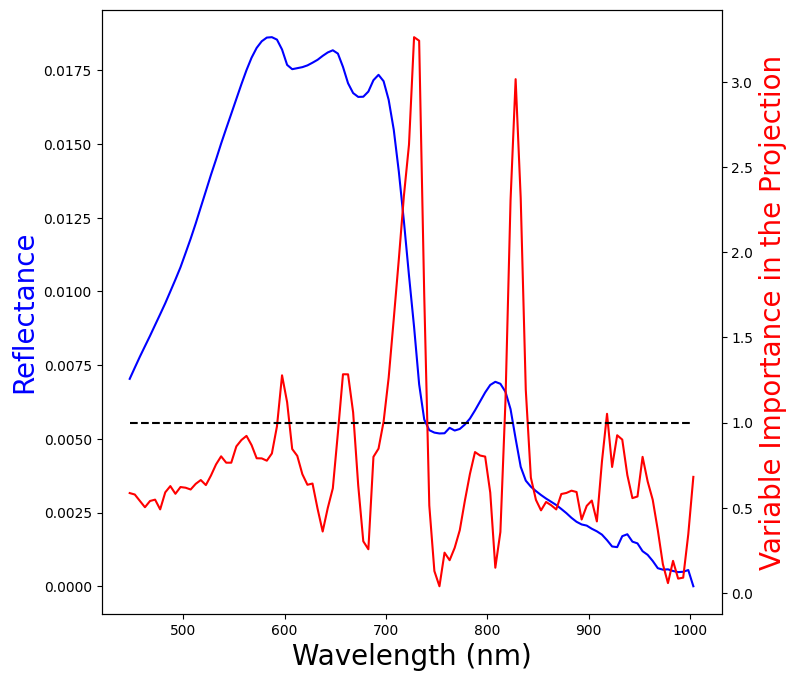

In [ ]:
print('R2 = {0}'.format(r2_2))

# Examine the differences in variable importance between the derivative and reflectance models
plt.plot(waves, mean_refl, color='b')
plt.ylabel('Reflectance', color='b', fontsize=20)
plt.xlabel('Wavelength (nm)', fontsize=20)
plt.twinx()
plt.plot(waves, vips2, color='r')
plt.plot([waves[0], waves[-1]], [1,1], linestyle='dashed', color='k')
plt.ylabel('Variable Importance in the Projection', color='r', fontsize=20)
plt.show()

In [ ]:
# Apply the model to the imagery
# Set up an array of water pixels based on the NDVI water/land mask with which to estimate TSS values per pixel
water_mask_path = os.path.join(output_dir, 'NDVI_mask.tif')
water_mask = gdal.Open(water_mask_path).ReadAsArray()
water_pixels = water_mask[water_mask == 0]
tss_est = water_pixels + constant

# Use the ~1000nm NIR band reflectance values as a correction factor for all bands
# Convert from "water-leaving reflectance" to "remote sensing reflectance" by dividing by pi
band1000 = img_open.GetRasterBand(126).ReadAsArray()
corr1000 = (band1000[water_mask == 0])/np.pi

# Loop through each band in the wavelength range corresponding to the training data (~446-1000nm)
# Open the bands that correspond to a VIP>1 and apply the corresponding model coefficient
j = 0
k = 0
for i in range(14, 126):
    if vip_bin[j] == 1:
        band_refl = img_open.GetRasterBand(i+1).ReadAsArray()[water_mask == 0]
        band_Rrs = band_refl/np.pi - corr1000
        tss_est = tss_est + (band_Rrs * coefs[k])
        k += 1
    j += 1
tss_est[tss_est < 0] = 0

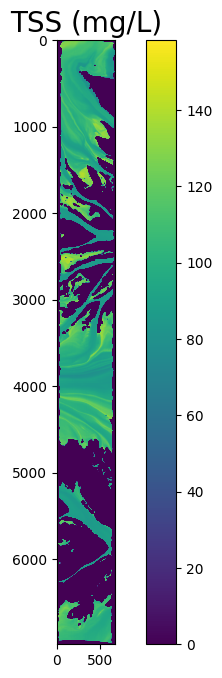

In [ ]:
# Populate the modeled TSS values back into a copy of the water mask
tss_map = np.copy(water_mask)
tss_map[water_mask == 0] = tss_est
tss_map[water_mask == 1] = -9999
plt.imshow(tss_map, vmin=0)
plt.colorbar()
plt.title('TSS (mg/L)', fontsize=20)
plt.show()

In [ ]:
# Export the TSS map
outfile = os.path.join(output_dir, 'TSS.tif')
driver = gdal.GetDriverByName("GTiff")
DataSetOut = driver.Create(outfile, cols, rows, 1, datatype)
DataSetOut.GetRasterBand(1).WriteArray(tss_map)
DataSetOut.SetProjection(projection)
DataSetOut.SetGeoTransform(transform)
DataSetOut = None